In [1]:
import matplotlib.pyplot as py
import pandas as pd
import numpy as np
import random as rd
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
loc = input("Enter position of file in ur pc with double backslash, for default location type \"1\": ")
if (loc == "1"):
    loc = "dinos.csv"
data = pd.read_csv(loc)

Enter position of file in ur pc with double backslash, for default location type "1":  1


In [3]:
species = data.Species.unique()
speciesdict = dict(zip(species, range(len(species))))
data = data.replace(speciesdict)
data = data.replace({'M':0,'F':1})
print(data)

     Species  Weight  Length   Age  TailLength   Height   Width  Gender  \
0          0  1650.0    59.0  63.4        68.0  10.8120  7.4800       0   
1          1   145.0    22.0  24.0        25.5   6.3750  3.8250       0   
2          1   820.0    37.1  40.0        42.5  11.1350  6.6300       1   
3          2   242.0    23.2  25.4        30.0  11.5200  4.0200       1   
4          1   650.0    36.5  39.0        41.4  11.1366  6.0030       0   
..       ...     ...     ...   ...         ...      ...     ...     ...   
154        5     7.0    10.1  10.6        11.6   1.7284  1.1484       1   
155        2   850.0    32.8  36.0        41.6  16.8896  6.1984       1   
156        1   900.0    37.0  40.0        42.5  11.7300  7.2250       0   
157        6   273.0    23.0  25.0        28.0  11.0880  4.1440       1   
158        5     6.7     9.3   9.8        10.8   1.7388  1.0476       1   

     Completeness  
0           0.545  
1           0.531  
2           0.661  
3           0.793  

In [4]:
a = np.arange(data.shape[0])
np.random.shuffle(a)
Train = data.iloc[a[:int(data.shape[0]*0.7)],]
Test = data.iloc[a[int(data.shape[0]*0.7):],]
print(Train)
print(Test)

     Species  Weight  Length   Age  TailLength   Height   Width  Gender  \
146        1   110.0    20.0  22.0        23.5   5.5225  3.9950       1   
155        2   850.0    32.8  36.0        41.6  16.8896  6.1984       1   
98         1   180.0    23.0  25.0        26.5   6.4395  3.6835       1   
39         5     8.7    10.8  11.3        12.6   1.9782  1.2852       0   
157        6   273.0    23.0  25.0        28.0  11.0880  4.1440       1   
..       ...     ...     ...   ...         ...      ...     ...     ...   
74         1   115.0    19.0  21.0        22.5   5.9175  3.3075       1   
137        1   250.0    25.9  28.0        29.4   7.8204  4.2042       0   
63         3   140.0    21.0  22.5        25.0   6.5500  3.3250       1   
41         1    40.0    13.8  15.0        16.0   3.8240  2.4320       1   
75         3   200.0    22.1  23.5        26.8   7.3968  4.1272       1   

     Completeness  
146         0.935  
155         0.849  
98          0.354  
39          0.955  

In [5]:
mean = Train.mean()
max = Train.max()
min = Train.min()
weight = Train.Weight
Train = (Train - mean)/(max-min)
Train.Weight = weight
weight = Test.Weight
Test = (Test - mean)/(max-min)
Test.Weight = weight
print(Train)
print(Test)

      Species  Weight    Length       Age  TailLength    Height     Width  \
146 -0.204204   110.0 -0.120826 -0.115741   -0.128987 -0.190187 -0.057940   
155 -0.037538   850.0  0.127718  0.138804    0.176756  0.469594  0.268582   
98  -0.204204   180.0 -0.062573 -0.061196   -0.078311 -0.136962 -0.104101   
39   0.462462     8.7 -0.299466 -0.310287   -0.313109 -0.395909 -0.459505   
157  0.629129   273.0 -0.062573 -0.061196   -0.052974  0.132851 -0.035860   
..        ...     ...       ...       ...         ...       ...       ...   
74  -0.204204   115.0 -0.140243 -0.133923   -0.145879 -0.167260 -0.159820   
137 -0.204204   250.0 -0.006263 -0.006650   -0.029325 -0.056810 -0.026939   
63   0.129129   140.0 -0.101408 -0.106650   -0.103649 -0.130548 -0.157227   
41  -0.204204    40.0 -0.241214 -0.243014   -0.255676 -0.288773 -0.289561   
75   0.129129   200.0 -0.080049 -0.088468   -0.073244 -0.081397 -0.038349   

       Gender  Completeness  
146  0.567568      0.400387  
155  0.567568  

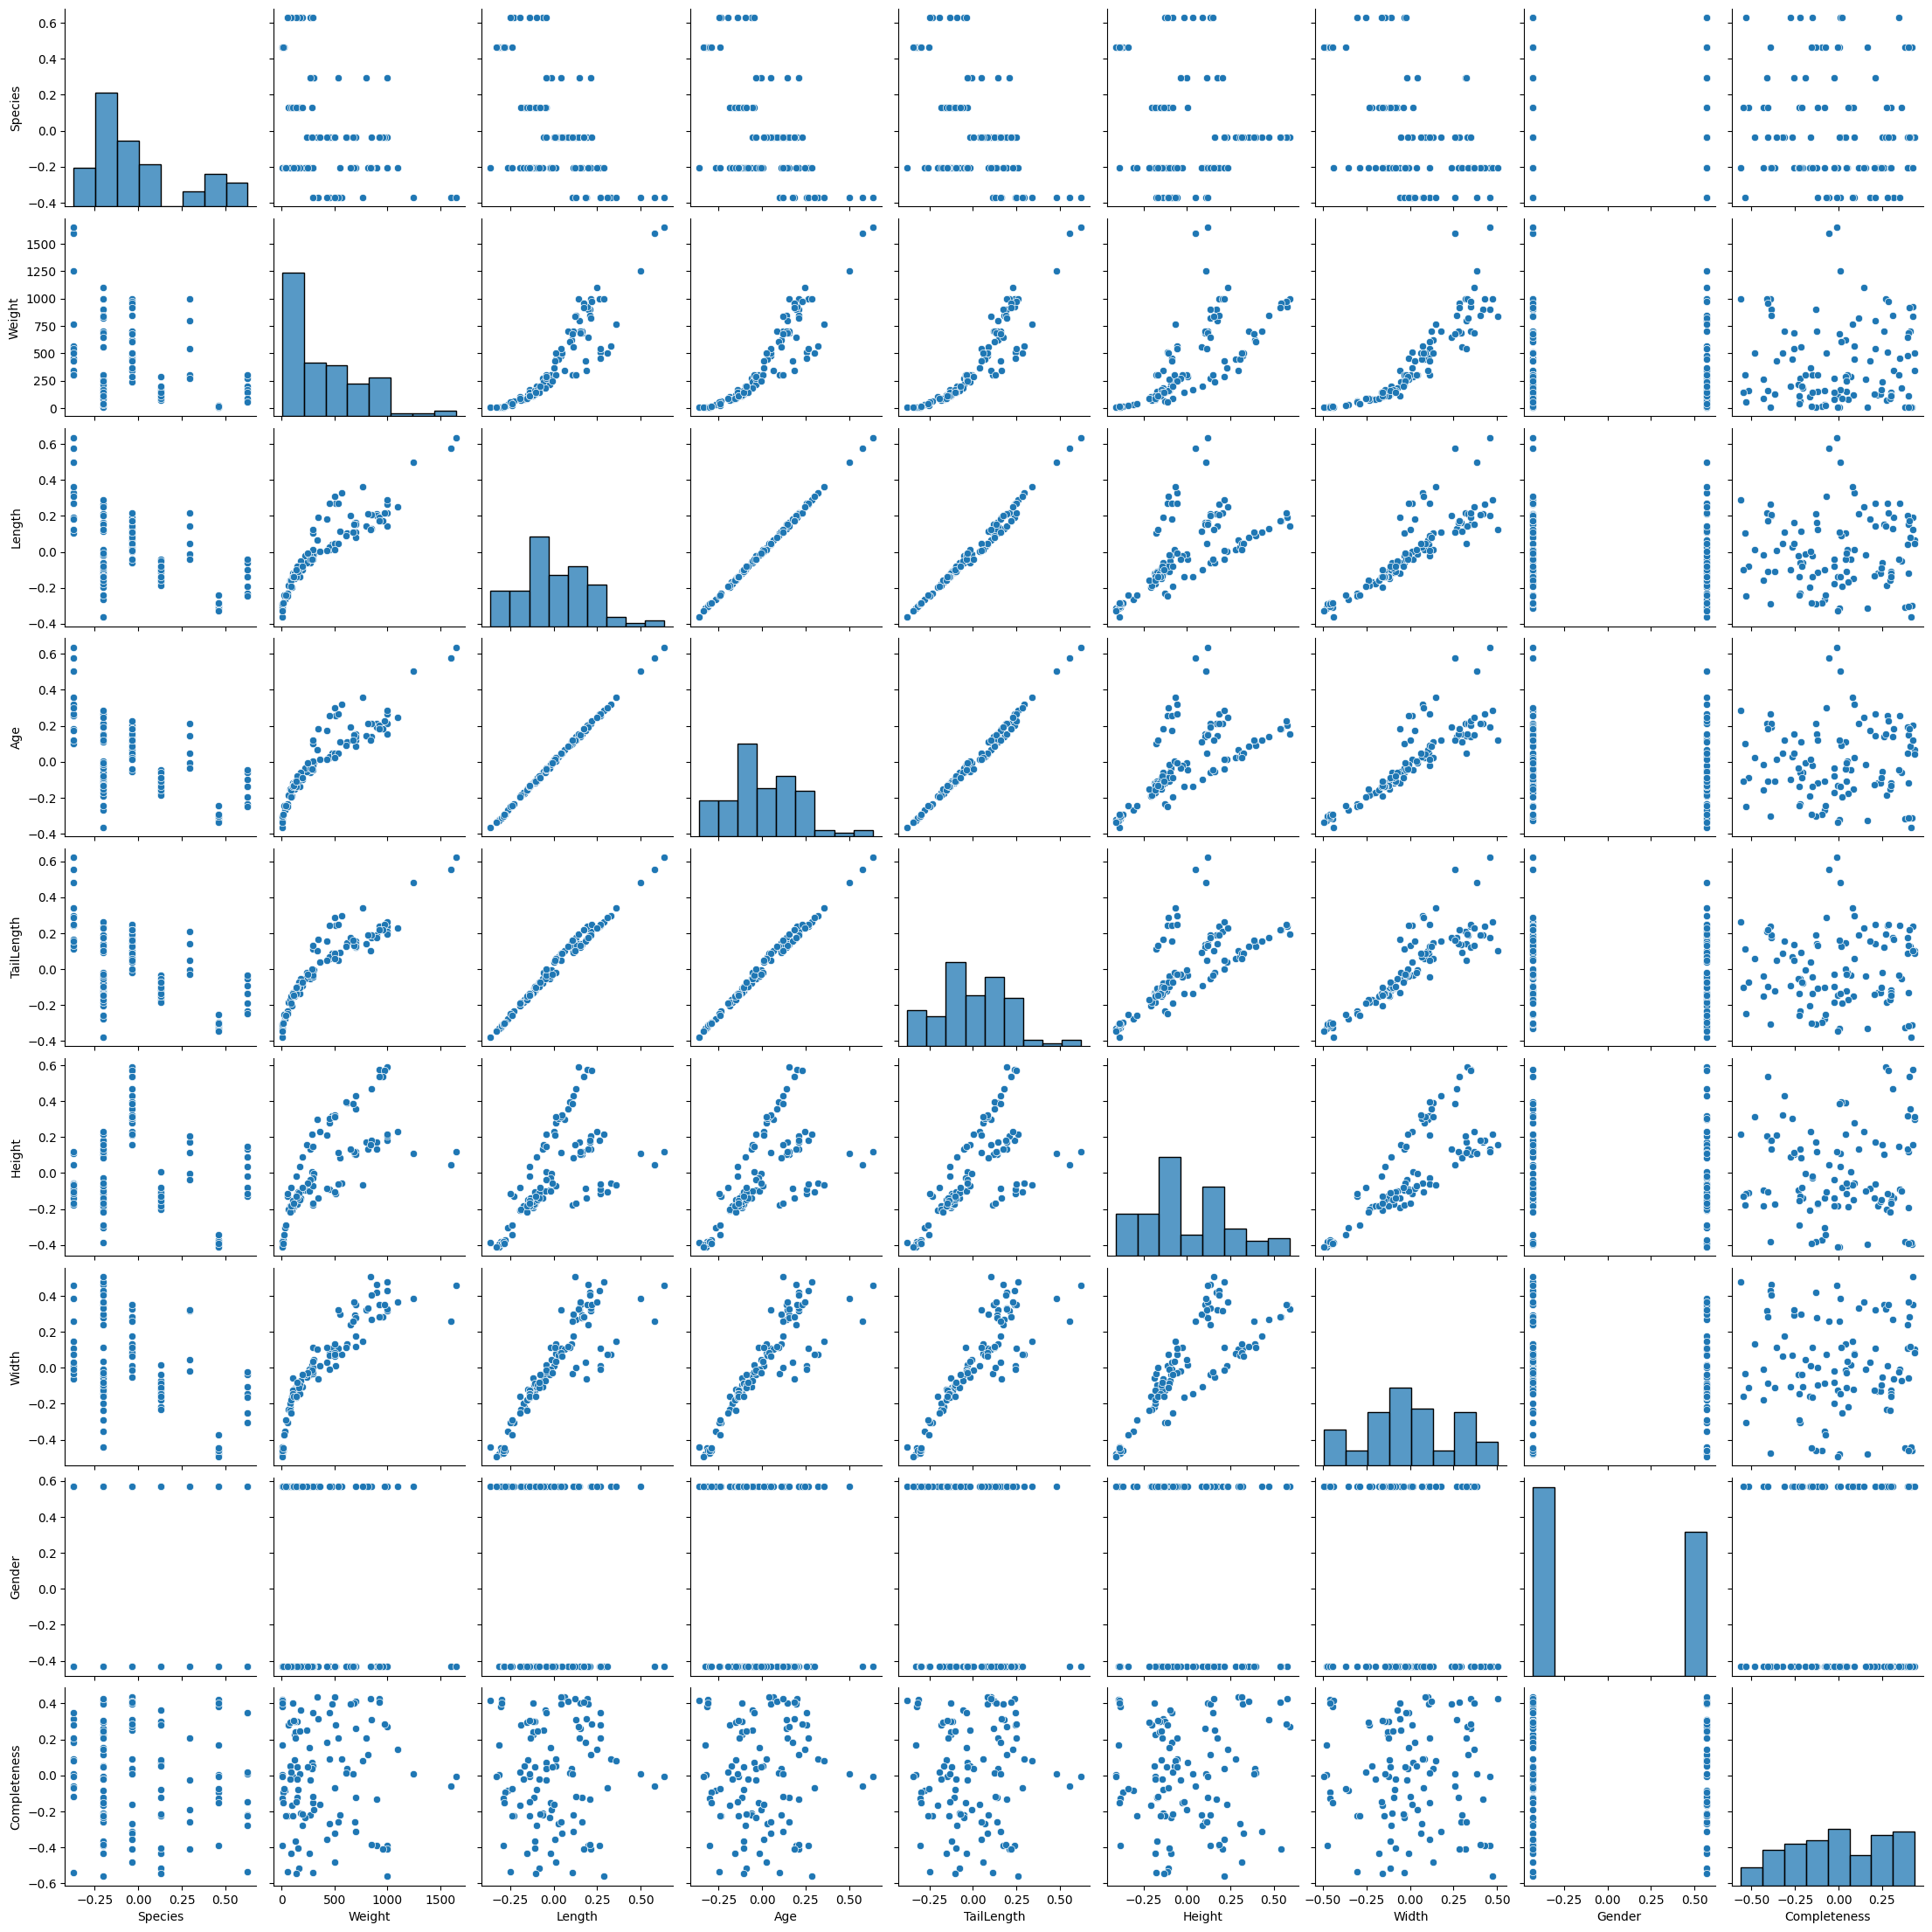

In [6]:
sns.pairplot(Train)

### From the  graph we can clearly see that weight is not linear with all other features, hence the power of the features should be greater than 1 and the categorical features (gender, species) should also be degree 2  by the looks of it although for species 4 or 6 would be better but we got less data so we dont want to overfit. completness looks completely random, so degree 2 would be good enough as it doesnt look like weight depends too much on it.

In [7]:
features = Train.loc[:,Train.columns!="Weight"].values
target = Train.Weight.values
print(features,target)

[[-2.04204204e-01 -1.20825680e-01 -1.15741196e-01 -1.28987095e-01
  -1.90186954e-01 -5.79398325e-02  5.67567568e-01  4.00386774e-01]
 [-3.75375375e-02  1.27718009e-01  1.38804259e-01  1.76756148e-01
   4.69593876e-01  2.68581707e-01  5.67567568e-01  3.10334418e-01]
 [-2.04204204e-01 -6.25732529e-02 -6.11957412e-02 -7.83114195e-02
  -1.36961503e-01 -1.04100974e-01  5.67567568e-01 -2.07990189e-01]
 [ 4.62462462e-01 -2.99466457e-01 -3.10286650e-01 -3.13108717e-01
  -3.95908835e-01 -4.59504717e-01 -4.32432432e-01  4.21329183e-01]
 [ 6.29129129e-01 -6.25732529e-02 -6.11957412e-02 -5.29735817e-02
   1.32851482e-01 -3.58595432e-02  5.67567568e-01 -2.21602755e-01]
 [-3.70870871e-01  1.89853932e-01  1.84258804e-01  1.66621013e-01
  -1.39486375e-01 -6.06072500e-02 -4.32432432e-01  3.15570020e-01]
 [-2.04204204e-01 -1.59713111e-02 -1.57411957e-02 -3.77708790e-02
  -9.47235965e-02 -7.55527982e-03 -4.32432432e-01 -4.33121079e-01]
 [-2.04204204e-01 -1.20825680e-01 -1.15741196e-01 -1.28987095e-01
  -

In [8]:
features2 = Test.loc[:,Train.columns!="Weight"].values
target2 = Test.Weight.values

In [9]:
w= np.zeros(len(features[0])*2)
b=0

In [10]:
epochs = 10000
Learnrate = 0.001
costlist = np.zeros(epochs)
cost2list = np.zeros(epochs)
accuracylist = np.zeros(epochs)
epochlist = np.arange(epochs)

In [11]:
i=0
featuresedit = np.hstack((features,features**2))
features2edit = np.hstack((features2,features2**2))
while (i<epochs):
    prediction = np.dot(featuresedit,w)+b
    dw = (np.dot(featuresedit.T,prediction-target))/len(target)
    db = (np.sum(prediction-target))/len(target)
    w = w-Learnrate*dw
    b = b - Learnrate*db
    prediction2 = np.dot(features2edit,w)+b
    cost = np.sum((prediction-target)**2)/(2*len(target))
    costlist[i] = cost
    cost2 = np.sum((prediction2-target2)**2)/(2*len(target))
    cost2list[i] = cost2
    accuracy = 100-(np.sum(((prediction2-target2)**2))/np.sum(((np.mean(target2)-target2)**2)))*100
    accuracylist[i] = accuracy
    i=i+1

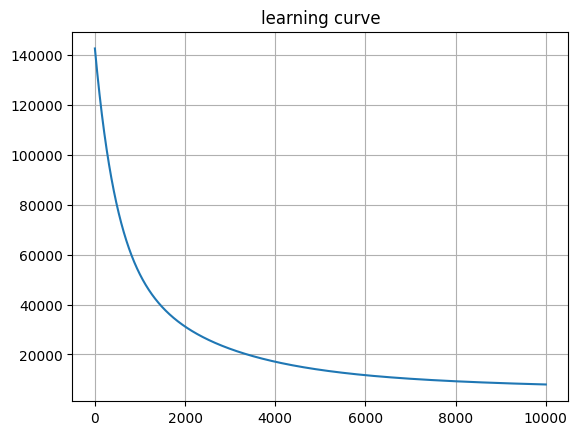

In [12]:
py.plot(epochlist,costlist)
py.title("learning curve")
py.grid()
py.show()

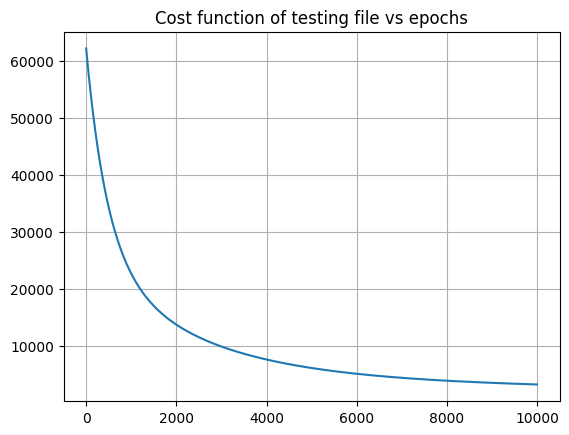

In [13]:
py.plot(epochlist,cost2list)
py.title("Cost function of testing file vs epochs")
py.grid()
py.show()

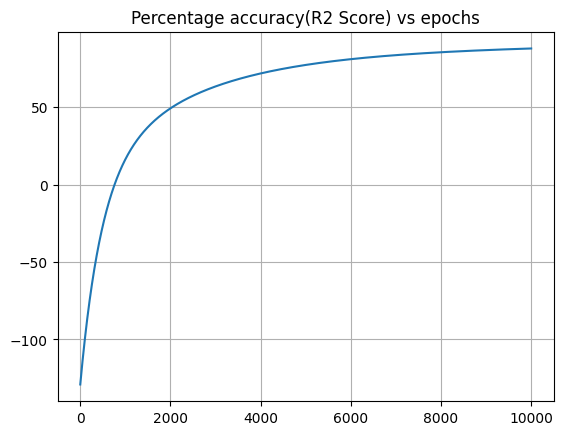

In [14]:
py.plot(epochlist,accuracylist)
py.title("Percentage accuracy(R2 Score) vs epochs")
py.grid()
py.show()

In [15]:
print("Final percentage Accuracy or R2Score: ", accuracy)

Final percentage Accuracy or R2Score:  87.89960437999241


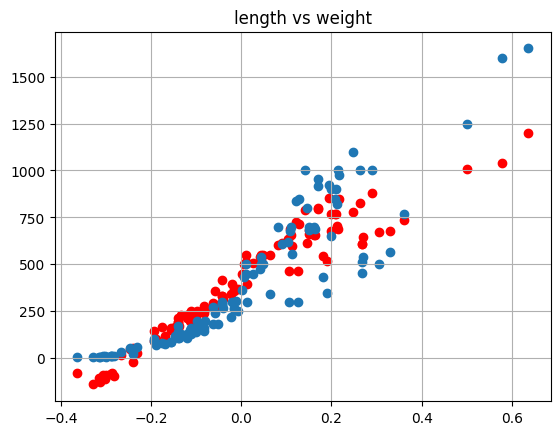

In [19]:
py.scatter(Train.Length.values,np.dot(featuresedit,w)+b, color='red')
py.scatter(Train.Length.values, Train.Weight.values)
py.title('length vs weight')
py.grid()
py.show()